In [1]:

#Let's go ahead and start with some imports
# For division
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.linearmodels as snslin
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [2]:

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]


In [3]:


# The tech stocks we'll use for this analysis
tech_list = ['SPY','BRK-B','NKX','PFF','VNQ','HCN','WM', 'DEM', 'EEM', 'EDIV','DVYE', 'BABA', 'AABA']


In [4]:

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [5]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list,'google',start,end)['Close']

# Let's take a quick look
print(closing_df.tail())

# Make a new tech returns DataFrame for all stocks
tech_rets = closing_df.pct_change()


             AABA    BABA   BRK-B    DEM   DVYE   EDIV    EEM    HCN    NKX  \
Date                                                                          
2017-06-26  54.31  142.73  167.49  41.19  40.36  29.95  41.90  77.66  15.67   
2017-06-27  53.64  141.53  167.35  40.77  40.05  29.72  41.41  76.50  15.72   
2017-06-28  54.95  143.95  169.89  41.13  40.35  29.97  41.73  76.53  15.75   
2017-06-29  54.30  140.81  169.30  40.53  39.87  29.62  41.20  74.50  15.60   
2017-06-30  54.48  140.90  169.37  40.99  40.17  29.84  41.39  74.85  15.57   

              PFF     SPY    VNQ     WM  
Date                                     
2017-06-26  39.22  243.29  84.75  73.46  
2017-06-27  39.13  241.33  83.99  73.11  
2017-06-28  39.20  243.49  84.19  73.52  
2017-06-29  39.07  241.35  83.23  73.02  
2017-06-30  39.17  241.80  83.23  73.35  


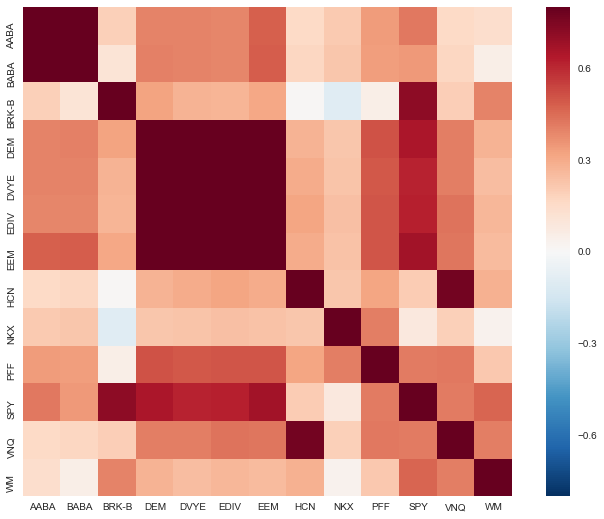

In [6]:
# calculate the correlation matrix for the normalized stock pct changes
corrmat =  tech_rets.corr()


##### Plot in heatmap()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)



In [7]:

##### Only for ipython notebook?

cmap=sns.diverging_palette(255, 0, sep=1, n=256, as_cmap=True)
corrmat.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,AABA,BABA,BRK-B,DEM,DVYE,EDIV,EEM,HCN,NKX,PFF,SPY,VNQ,WM
AABA,1,0.89,0.19,0.4,0.4,0.39,0.48,0.16,0.21,0.34,0.42,0.16,0.14
BABA,0.89,1,0.11,0.4,0.4,0.39,0.49,0.17,0.22,0.33,0.35,0.17,0.054
BRK-B,0.19,0.11,1,0.32,0.28,0.27,0.31,0.009,-0.097,0.052,0.72,0.19,0.4
DEM,0.4,0.4,0.32,1,0.94,0.91,0.95,0.28,0.22,0.51,0.66,0.41,0.28
DVYE,0.4,0.4,0.28,0.94,1,0.91,0.93,0.29,0.23,0.5,0.61,0.41,0.24
EDIV,0.39,0.39,0.27,0.91,0.91,1,0.91,0.32,0.24,0.5,0.62,0.43,0.27
EEM,0.48,0.49,0.31,0.95,0.93,0.91,1,0.3,0.23,0.5,0.67,0.43,0.25
HCN,0.16,0.17,0.009,0.28,0.29,0.32,0.3,1,0.22,0.32,0.2,0.77,0.28
NKX,0.21,0.22,-0.097,0.22,0.23,0.24,0.23,0.22,1,0.41,0.083,0.19,0.034
PFF,0.34,0.33,0.052,0.51,0.5,0.5,0.5,0.32,0.41,1,0.41,0.42,0.22


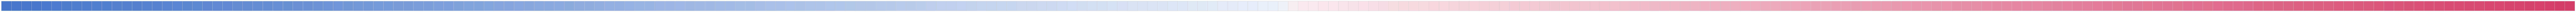

In [8]:
sns.palplot(sns.diverging_palette(255, 0, sep=1, n=256))